# EBAnO - other models

Please notice that the results showed here are **complementary** to the ones reported in the paper. They have been computed with **different configurations w.r.t. the ones in the paper** (i.e. different images analyzed with different models, different number of layers analyzed, and different number of interpretable features). Feel free to try the input images with different models and different classes-of-interest to further analyze the models behaviors.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.python.keras.preprocessing import image

from tensorflow.keras.applications import vgg19, VGG19
from tensorflow.keras.applications import inception_v3, InceptionV3
from tensorflow.keras.applications import inception_resnet_v2, InceptionResNetV2

In [2]:
def load_image(image_url, target_size):
    img = image.load_img(image_url, target_size=target_size)
    return img

def preprocess_function(img, model_preproc):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return model_preproc(x)

## Import EBAnO Local Explanation Model

In [3]:
from ebano_express.explainer import LocalExplanationModel

## Explaining VGG19 DCNN model

In [4]:
VGG19_model = VGG19(include_top=True, weights='imagenet', classes=1000)

target_size = VGG19_model._feed_input_shapes[0][1:3]
print("target_size:", target_size)

target_size: (224, 224)


### Load target image

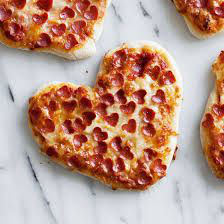

In [5]:
IMAGE_URL = "./data/pizza4.png"

input_image = load_image(IMAGE_URL, target_size)
input_image

### Make predictions

In [6]:
# Preprocess image
x = preprocess_function(input_image, vgg19.preprocess_input)

# Predict
predictions = VGG19_model.predict(x)

# Show top-10 predictions
top_preds = 10
decoded_predictions = vgg19.decode_predictions(predictions, top=top_preds)[0]
preds_indexes = np.argsort(predictions[0])[::-1][:top_preds] # Get indexes of top-10 predictions
pd.DataFrame(decoded_predictions, columns=["WNID", "Class name", "Prob."], index=preds_indexes).style.background_gradient()

,WNID,Class name,Prob.
963,n07873807,pizza,0.483897
931,n07693725,bagel,0.155534
987,n12144580,corn,0.054574
932,n07695742,pretzel,0.052144
962,n07871810,meat_loaf,0.037294
415,n02776631,bakery,0.035705
930,n07684084,French_loaf,0.035601
949,n07745940,strawberry,0.021966
923,n07579787,plate,0.017854
957,n07768694,pomegranate,0.013015


### Why should it be a pizza for VGG19?

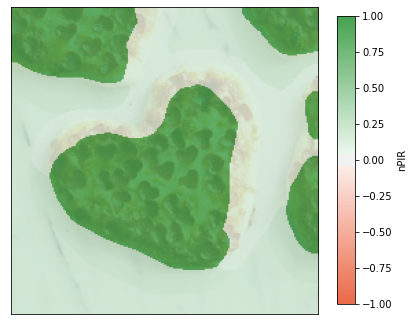

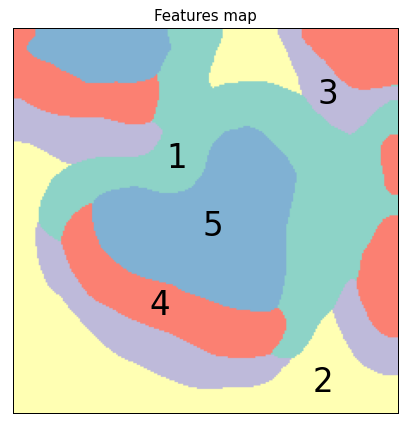

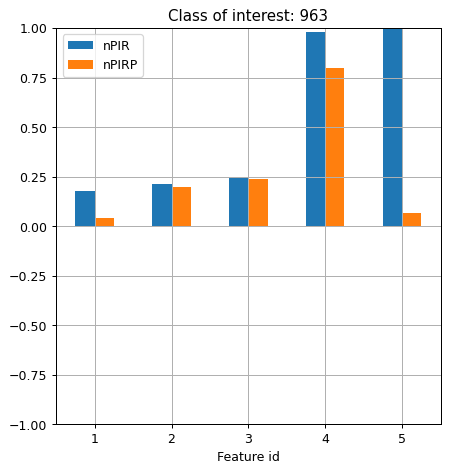

In [7]:
ebano_local_exp_vgg19 = LocalExplanationModel(input_image, 963,
                                        VGG19_model,
                                  preprocess_func=lambda x: preprocess_function(x, vgg19.preprocess_input),
                                  max_features=5,
                                  layers_to_analyze=5)

ebano_local_exp_vgg19.fit_explanation()

ebano_local_exp_vgg19.best_explanation.show_visual_explanation()
plt.show()
plt.close()

ebano_local_exp_vgg19.best_explanation.show_features_map()
plt.show()
plt.close()

ebano_local_exp_vgg19.best_explanation.show_numerical_explanation()
plt.show()
plt.close()

## Explaining InceptionV3 DCNN model

In [8]:
InceptionV3_model = InceptionV3(include_top=True, weights='imagenet', classes=1000)

target_size = InceptionV3_model._feed_input_shapes[0][1:3]
print("target_size:", target_size)

target_size: (299, 299)


### Load target image

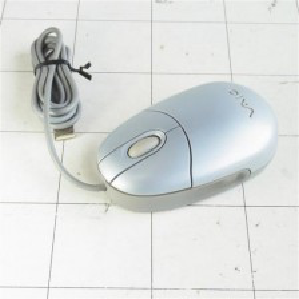

In [9]:
IMAGE_URL = "./data/mouse.png"

input_image = load_image(IMAGE_URL, target_size)
input_image

In [10]:
# Preprocess image
x = preprocess_function(input_image, inception_v3.preprocess_input)

# Predict
predictions = InceptionV3_model.predict(x)

# Show top-10 predictions
top_preds = 10
decoded_predictions = inception_v3.decode_predictions(predictions, top=top_preds)[0]
preds_indexes = np.argsort(predictions[0])[::-1][:top_preds] # Get indexes of top-10 predictions
pd.DataFrame(decoded_predictions, columns=["WNID", "Class name", "Prob."], index=preds_indexes).style.background_gradient()

,WNID,Class name,Prob.
673,n03793489,mouse,0.718254
882,n04517823,vacuum,0.010248
674,n03794056,mousetrap,0.008639
589,n03483316,hand_blower,0.003794
896,n04553703,washbasin,0.002637
861,n04447861,toilet_seat,0.002453
466,n02917067,bullet_train,0.002390
840,n04367480,swab,0.001957
473,n02951585,can_opener,0.001938
778,n04141975,scale,0.001863


### Why should it be a mouse for InceptionV3?

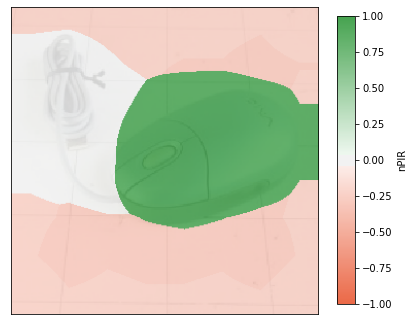

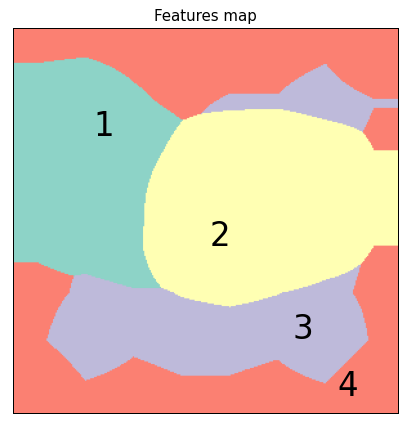

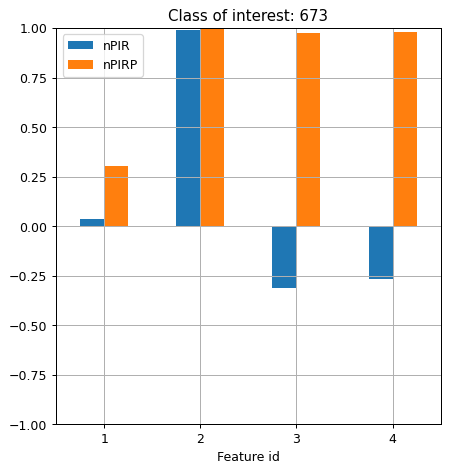

In [11]:
ebano_local_exp_inceptionV3 = LocalExplanationModel(input_image, 673,
                                        InceptionV3_model,
                                  preprocess_func=lambda x: preprocess_function(x, inception_v3.preprocess_input),
                                  max_features=5,
                                  layers_to_analyze=10)

ebano_local_exp_inceptionV3.fit_explanation()

ebano_local_exp_inceptionV3.best_explanation.show_visual_explanation()
plt.show()
plt.close()

ebano_local_exp_inceptionV3.best_explanation.show_features_map()
plt.show()
plt.close()

ebano_local_exp_inceptionV3.best_explanation.show_numerical_explanation()
plt.show()
plt.close()

## Explaining InceptionResNetV2 DCNN model

In [12]:
InceptionResNetV2_model = InceptionResNetV2(include_top=True, weights='imagenet', classes=1000)

target_size = InceptionResNetV2_model._feed_input_shapes[0][1:3]
print("target_size:", target_size)

target_size: (299, 299)


### Load target image

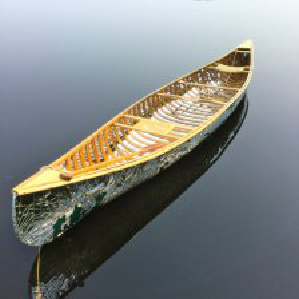

In [13]:
IMAGE_URL = "./data/canoe.png"

input_image = load_image(IMAGE_URL, target_size)
input_image

In [14]:
# Preprocess image
x = preprocess_function(input_image, inception_resnet_v2.preprocess_input)

# Predict
predictions = InceptionResNetV2_model.predict(x)

# Show top-10 predictions
top_preds = 10
decoded_predictions = inception_resnet_v2.decode_predictions(predictions, top=top_preds)[0]
preds_indexes = np.argsort(predictions[0])[::-1][:top_preds] # Get indexes of top-10 predictions
pd.DataFrame(decoded_predictions, columns=["WNID", "Class name", "Prob."], index=preds_indexes).style.background_gradient()

,WNID,Class name,Prob.
472,n02951358,canoe,0.930477
693,n03873416,paddle,0.012244
576,n03447447,gondola,0.003957
975,n09332890,lakeside,0.000681
814,n04273569,speedboat,0.000542
449,n02859443,boathouse,0.000376
914,n04612504,yawl,0.000335
714,n03929660,pick,0.000314
316,n02256656,cicada,0.000308
977,n09421951,sandbar,0.000283


### Why should it be a canoe for InceptionResNetV2?

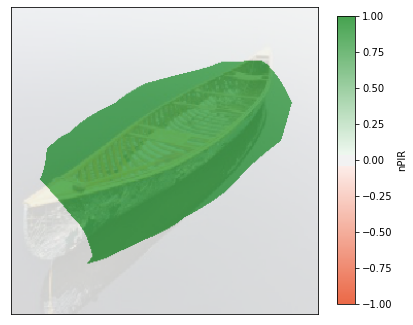

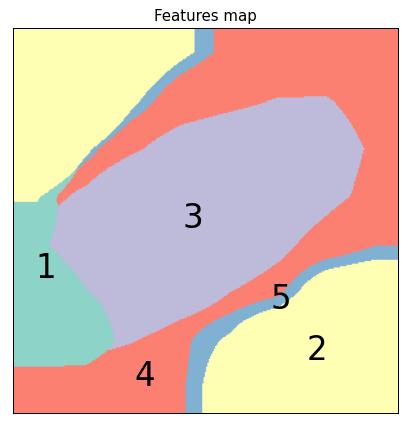

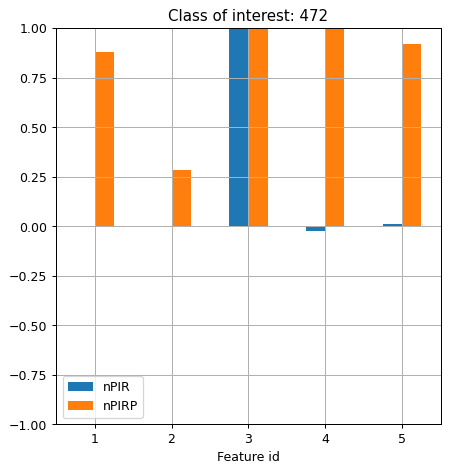

In [15]:
ebano_local_exp_inception_resnet_v2 = LocalExplanationModel(input_image, 472,
                                        InceptionResNetV2_model,
                                  preprocess_func=lambda x: preprocess_function(x, inception_resnet_v2.preprocess_input),
                                  max_features=5,
                                  layers_to_analyze=10)

ebano_local_exp_inception_resnet_v2.fit_explanation()

ebano_local_exp_inception_resnet_v2.best_explanation.show_visual_explanation()
plt.show()
plt.close()

ebano_local_exp_inception_resnet_v2.best_explanation.show_features_map()
plt.show()
plt.close()

ebano_local_exp_inception_resnet_v2.best_explanation.show_numerical_explanation()
plt.show()
plt.close()